# The Multilayer-Perceptron

The Perceptron and Adaline algorithms are characterized by generating a **direct mapping between input and output patterns**. Such characteristic is a direct result of their **single-layer architecture**. With one layer, there is no place to generate **intermediate representations** of the inputs before mapping to the outputs. The idea of **generating internal representations of the entities from the outside world is a core notion in cognitive science**: the mind and the brain must do some form of internal processing and reorganization of the information captured from the environment, that allows things like reasoning, language, and complex thinking and behavior more generally. Hence, it is hardly surprising that a single-layer Perceptron or Adaline could not recreate many human cognitive capacities. Marvin Minsky and Seymour Papert devoted an entire book (‘Perceptrons’, 1969) to show the many limitations of Perceptrons as learning algorithms. One classical example of the limitations of single-layer architectures with linear units is the **exclusive-or (XOR) problem** illustrated in *Table 1* below: 

<center>Table 1</center>

| Input patterns | -> | Output Patterns |
|----------------|----|-----------------|
| 00             | -> | 0               |
| 01             | -> | 1               |
| 10             | -> | 1               |
| 11             | -> | 0               |

The XOR problem seems to be a **trivially easy to solve for humans**: when the input patterns are the same, output 1; when they are different, output 0. There is a simple graphical way to show why a Perceptron can’t learn to solve such a simple problem as shown in the *Figure 1* below.

<center>Figure 1</center>

<img src="images/XOR_linear.png" width="60%">

The X-axis and Y-axis reflect the combination of binary features in the XOR problem (0 or 1). When X = Y = 0, the output should be 0, when X = 1 and Y = 0, the output should be 1. The dashed orange line represents the **decision boundary** generated by the Perceptron. The red 1s and 0s represent incorrect classifications; the green 1s and 0s represent correct classifications. As we can see, there is **no way to generate a decision boundary capable of classifying all the instances correctly** (you can keep trying all possible straight lines, and won't work). The box in the lower right corner shows a case where all instances are correctly classified, but to do that we need two boundaries instead of one. There are two possible approaches to tackle this problem: (1) **changing the representation of the problem**, this is to say, generating some sort of transformation of the inputs into a space that is linearly separable, or (2) using a model that is not restricted to linear decision boundaries, i.e., **allowing for non-linearities in the model**. 

Since changing the representation of a problem involves some form of transformation of the inputs, an intuitive first step could be just to modify the input features by hand. For instance, we could try a coding scheme like the one in *Table 2*. In such a case, we are adding a third dimension that actually allows separating the 1s and 0s with a plane (linear model). Yet, this seems to be a very unsatisfactory solution since it requires **hand-crafting features** which **do not generalize** well beyond toy problems. 

<center>Table 2</center>

| Input patterns  | -> | Output Patterns |
|-----------------|----|-----------------|
| 000             | -> | 0               |
| 010             | -> | 1               |
| 100             | -> | 1               |
| 111             | -> | 0               |

A second approach could be just adding more layers to the Perceptron. Unfortunately, **no matter how many layers we add, the output of a linear model, is a linear decision boundary**. Therefore, that is not a viable solution. A combination of **adding more layers and allowing for non-linearities** in the model seems to be the way to go, and that was precisely what Rumelhart, Hinton, and Williams did in 1985.

## A new generation of artificial neural networks

Even though Rumelhart, Hinton, and Williams called this architecture 'Multilayer-Perceptron', the learning procedure differs significantly from the Perceptron: the Perceptron learning rule operates over a binary threshold function, whereas **the Multilayer-Perceptron operates over the linear or (non-linear) output *before* passing the output through the binary threshold function** for prediction (in the case of binary classification). 

The Multilayer-Perceptron differs from the Adaline as well. Widrow and Hoff did come up with the idea of creating a multilayer Adaline, known as the MADALINE (Many Adalines). Yet, the Adaline and MADALINE are limited to **strictly linear units**, and strictly linear units are subject to the linear separability constraint. Rumelhart, Hinton, and Williams overcome such limitations by adding **non-linear** processing units to the Multilayer-Perceptron architecture. 

Before going further, it is important to think on **why is that concatenating multiple layers with non-linear units works**. As we saw before, hand-crafted features can help a linear system to solve the XOR problem, but such solutions do not scale up to larger problems. In essence, adding multiple layers of processing units is a way to **automate the so-called feature engineering** process. With multiple layers, now is the **network itself search for new features in an iterative fashion**, and that happens in the hidden layers. Additionally, allowing for non-linear activation functions **expands the set of possible features to be learned** beyond linear boundaries. For instance, in the case of the XOR problem, a non-linear decision boundary could be learned automatically. This is why modern artificial neural networks are considered **universal function approximators**: with enough computation and data, a neural network can approximate functions of any shape.

Mathematically speaking, the remaining challenge was to find a way to **efficiently adjust the weights across the multiple layers** of the network. One option is to randomly guess values for the weights, then evaluate the error, and repeat until a good enough solution has been found. Unfortunately, this approach is extremely slow and inefficient, particularly for large networks with millions of weights to be adjusted. Fortunately, as we saw with the Adaline, there is a better way: adjusting the weights via **backpropagation**, i.e., the **chain-rule of calculus**. We can use this method, because Multilayer-perceptrons use **continuous functions instead of binary threshold functions**, which are differentiable using the rules of calculus.

The application of the backpropagation algorithm in multilayer neural network architectures was a major breakthrough in the artificial intelligence and cognitive science community, that catalyzed a new generation of research in cognitive science. Nonetheless, it took several decades of advance on computing and data availability before artificial neural networks became the dominant paradigm in the research landscape as it is today.

## Formal definition of the multilayer perceptron with non-linear units

The precise mathematical definition of a multilayer perceptron will depend on the chosen architecture, this is to say, how many layers, how many units, whether it is fully connected, etc. Let's take a simple fully connected neural network with two input neurons in the **input layer**, three neurons in the **hidden layer**, and one neuron in the **output layer**.

<img src="images/forward_neural_net_2_inputs.png" width="60%">

Let's unpack the math from the forward pass of information to make predictions.

**Step 1: Matrix multiplication input to hidden layer**

$$\begin{bmatrix} 
w_{11} & w_{12} & w_{13} \\ 
w_{21} & w_{22} & w_{23} \\ 
\end{bmatrix}
\begin{bmatrix} 
x_{1} \\ 
x_{2} \\
x_{3}
\end{bmatrix}
$$

We first take the dot product of the matrix of weights ($w_{ij}$ with the vector of inputs ($x_i$) to compute $z_i$ as

$$\begin{equation}
z_{i} = \sum_{j=1}^{3} x_j w_{ij}
\end{equation}$$

**Step 2: Pass $z_i$ through the sigmoid activation function $S(z)$ in the hidden layer**

$$\begin{equation}
S(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }
\end{equation}
$$ 

We use the value of $z_i$ as a parameter for the sigmoid function in each node

**Step 3: Multiplication output vector of the hidden layer with vector for weights**

$$\begin{bmatrix} 
w_{11} & w_{12} & w_{13} \\ 
\end{bmatrix}
\begin{bmatrix} 
s_{1} \\ 
s_{2} \\
s_{3}
\end{bmatrix}
$$

We take the dot product between the output vector from the hidden layer and the vector of weights connecting to the output layer.

**Step 4: Pass $z$ through the sigmoid activation function $S(z)$ in the output layer**

$$\begin{equation}
S(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }
\end{equation}
$$ 

Now we obtain our predicted value $\hat{y}$

**Step 5: Pass $\hat{y}$ through the binary decision function $f(S)$**

$$ 
\begin{equation}
f(S) = \begin{cases} 1, & \mbox{if S(z)>0} \\ 0, & \mbox{otherwise} \end{cases}
\end{equation}
$$

Finally, we classify as $0$ or $1$ based on the value of $f(S)$

All these steps **roughly describe the core of the forward pass of most neural networks**. More complex models like convolutional and recurrent nets implement essentially the same steps with different activation functions and links between layers.

## The backpropagation learning algorithm

We have seen how neural networks take data and make predictions. Now the question is how neural networks learn to make better predictions. As we mentioned, this is accomplished via the backpropagation algorithm. At its core, backpropagation is a clever way to **automate the search for parameters** (the arrows connecting the layers in our graph) that minimize the aggregate error of the predictions.

The goal of the backpropagation algorithm is to compute **how fast the error changes as we change the activity of the weights in the network**. A few relatively simple operations are used: 
1. **compute the error** between the predicted and expected value, in other words, the value of the so-called **loss function**
2. **compute the error derivatives** in the output layer, and from there 
3. **compute the error derivatives in the layers that came before**. In other words, the chain-rule of calculus throughout the layers. And finally,
4. **compute the error derivatives of the weights**

## Learning algorithm

Notes in how to learn the weights of a logistic unit:
- As we mentioned, adding layers of linear units does not change the learning capacities of a neural network, thefore, we will examine the learning algorithm procedure for a multilayer network with non-linear units directly.
- With hidden units, we face non-convex optimization problem, where the error surface defined by the weights, it is not shaped like a bowl. Therefore, you can easily get stuck in a local minima.
- We know how to compute the derivatives to adjust the weights in a network withouth hidden units. Unfortunately, such procedure does not generalize to multilayer networks. The challenge is to find a way to train the network
- Threshold functions won't work, because their derivative is infinite at the threshold, and zero elsewhere.
- The fact that sigmoid functions change smoothly and constiniously, generates nice derivative which make learning easy.
- To train the network, we first need to compute the derivative of the output with respect to the logit and the derivative of the logit with respect to the weights. Then, we can compute the derivative of the output with respect to the weights.

As we know, a linear function is defined as:
\begin{equation*}
z = \sum_{k=1}^n w_k x_k = w_0 x_0 + w_1 x_1 + ... + w_n x_n
\end{equation*}

The sigmoid function, will take the output ***z*** from the linear function as follow:

\begin{equation*}
S(z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} } 
\end{equation*}

HERE: equation that take the derivative of the error with respect to the weights

HERE: Explain how this generalize to training multiple layers using the backpropagation algorithm
- The key idea behind backpropagation is to compute how fast the error changes, as we change the **activity** of the hidden units.
- This means that we don't try to compute the 'ideal' activity of a hidden unit, but to compute the error derivatives with respect to the activity of the hidden units.
- Since the activity of a hidden unit, may affect the activity of many output units, and therefore, to affect the overall error via multiple outputs.
- The idea is to compute the error derivatives for all the hidden units **at the same time**. Once we have those derivatives, is easy to compute the error derivatives for the weights going into a hidden unit.

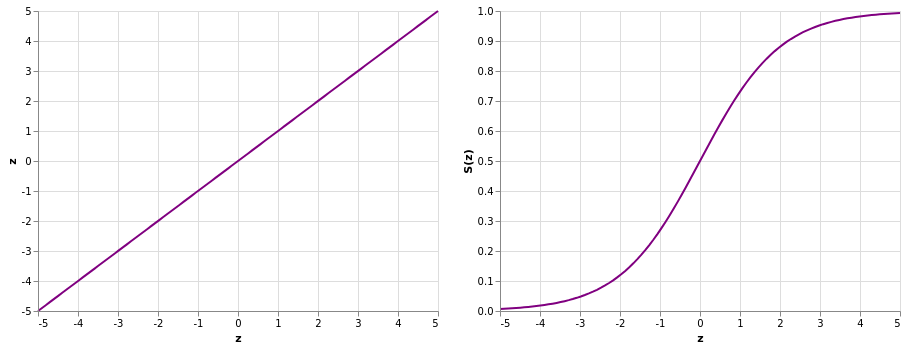

In [23]:
from scipy.special import expit
import numpy as np
import pandas as pd
import altair as alt

z = np.linspace(-5.0, 5.0, num=100)
s = expit(x)
df = pd.DataFrame({'z':z, 'S(z)':s})

base = alt.Chart(df).mark_line(color='purple')

lin = base.encode(
    x='z',
    y='z'
)

sig = base.encode(
    x='z',
    y='S(z)'
)


lin | sig 


## Multilayer perceptron implementation

In [ ]:
# TODO: 
# - create a function to generate training data for XOR problem
# - plot the training data
# - set up keras model 
# - train and test keras model
# - compute metrics

In [5]:
import numpy as np

In [6]:
# Define function to create figures type
def figure_type(mu1, sigma1, mu2, sigma2, n_samples, target, seed):
    '''creates [n_sampes, 2] array
    
    Parameters
    ----------
    mu1, sigma1: int, shape = [n_samples, 2]
        mean feature-1, standar-dev feature-1
    mu2, sigma2: int, shape = [n_samples, 2]
        mean feature-2, standar-dev feature-2
    n_samples: int, shape= [n_samples, 1]
        number of sample cases
    target: int, shape = [1]
        target value
    seed: int
        random seed for reproducibility
    
    Return
    ------
    X: ndim-array, shape = [n_samples, 2]
        matrix of feature vectors
    y: 1d-vector, shape = [n_samples, 1]
        target vector
    ------
    X'''
    rand = np.random.RandomState(seed)
    f1 = rand.normal(mu1, sigma1, n_samples)
    f2 = rand.normal(mu2, sigma2, n_samples)
    X = np.array([f1, f2])
    X = X.transpose()
    y = np.full((n_samples), target)
    return X, y

In [7]:
# create tall-figures matrix
T, y_t = figure_type(10, 2, 5, 1, 100, 1, 1)
nl = '\n'
print(f'Feature matrix shape: {T.shape} {nl}target vector shape: {y_t.shape}')
print(f'Feature matrix: {nl}{T[0:4, :]} {nl}target vector: {nl}{y_t[0:4]}')

Feature matrix shape: (100, 2) 
target vector shape: (100,)
Feature matrix: 
[[13.24869073  4.55287144]
 [ 8.77648717  6.2245077 ]
 [ 8.9436565   5.40349164]
 [ 7.85406276  5.59357852]] 
target vector: 
[1 1 1 1]


In [8]:
# create wide-figures matrix
W, y_w = figure_type(5, 1, 10, 2, 100, -1, 2)
nl = '\n'
print(f'Feature matrix shape: {W.shape} {nl}target vector shape: {y_w.shape}')
print(f'Feature matrix: {nl}{W[0:4, :]} {nl}target vector: {nl}{y_w[0:4]}')

Feature matrix shape: (100, 2) 
target vector shape: (100,)
Feature matrix: 
[[ 4.58324215 12.32304298]
 [ 4.94373317 10.7721561 ]
 [ 2.8638039   7.73373345]
 [ 6.64027081 10.86618511]] 
target vector: 
[-1 -1 -1 -1]


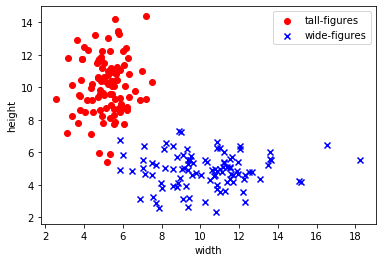

In [10]:
import matplotlib.pyplot as plt
plt.scatter(T[:, 1], T[:, 0], color='red', marker='o', label='tall-figures')
plt.scatter(W[:, 1], W[:, 0], color='blue', marker='x', label='wide-figures')
plt.xlabel('width')
plt.ylabel('height')
plt.legend(loc='upper right')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = np.concatenate((T, W), axis=0)
y = np.concatenate((y_t, y_w), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=1,
                                                    shuffle=True)

In [12]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (140, 2)
y_train.shape: (140,)
X_test.shape: (60, 2)
y_test.shape: (60,)


In [13]:
from keras.models import Sequential
model = Sequential()
model.add(Dense(2, input_dim=2, kernel_initializer='random_uniform'))
model.add(Dense(2, kernel_initializer='random_uniform'))
model.add(Activation('relu')) # create custom activation function here

In [2]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.
